Generating and Testing the Fried Infinate Phase Screens
-------------------------------------------------------

In [1]:
import numpy
import matplotlib.pylab as plt
from tqdm import tqdm, trange, tqdm_notebook
from astropy.io import fits

import aotools
from aotools.turbulence import infinitephasescreen_fried, phasescreen, infinitephasescreen

In [3]:
n_zerns = 60
nx_size = 128
D = 4.2
pxl_scale = D/nx_size
r0 = 0.164
L0 = 100
wind_speed = 10 #m/s - just arbitrarily set
n_tests = 10 # 16
n_scrns = 1000
noll = fits.getdata("../noll.fits").diagonal() * (D/r0)**(5./3)
stencil_length_factor = 32

Zs = aotools.zernikeArray(n_zerns, nx_size)

In [4]:
stencil_length_factor = 16


time_step = pxl_scale/wind_speed # This is timestep, as one pixel added on each iteration

z_coeffs_inf_f = numpy.zeros((n_tests, n_scrns, n_zerns))
# fig = pyplot.figure()

for n in tqdm(range(n_tests), desc='1st loop'):
    phase_screen = infinitephasescreen_fried.PhaseScreen(nx_size, pxl_scale, r0, L0, stencil_length_factor=stencil_length_factor)
    for i in range(n_scrns):
        # Go in all directions
        phase_screen.addRow()
        if n%4 == 0:
            scrn = phase_screen.scrn
        elif n%4 == 1:
            scrn = phase_screen.scrn.T
        elif n%4 == 2:
            scrn = phase_screen.scrn[::-1]
        else:
            scrn = phase_screen.scrn[::-1].T
            
        z_coeffs_inf_f[n, i] = (scrn * Zs).sum((-1, -2))/(Zs[0].sum())
        
z_vars_inf_f = z_coeffs_inf_f.var(1)

1st loop:   0%|          | 0/10 [00:00<?, ?it/s]

New size: 129


1st loop:  10%|█         | 1/10 [00:04<00:37,  4.21s/it]

New size: 129


1st loop:  20%|██        | 2/10 [00:07<00:32,  4.09s/it]

New size: 129


1st loop:  30%|███       | 3/10 [00:11<00:28,  4.06s/it]

New size: 129


1st loop:  40%|████      | 4/10 [00:16<00:24,  4.11s/it]

New size: 129


1st loop:  50%|█████     | 5/10 [00:20<00:20,  4.14s/it]

New size: 129


1st loop:  60%|██████    | 6/10 [00:24<00:16,  4.05s/it]

New size: 129


1st loop:  70%|███████   | 7/10 [00:28<00:12,  4.02s/it]

New size: 129


1st loop:  80%|████████  | 8/10 [00:32<00:07,  3.97s/it]

New size: 129


1st loop:  90%|█████████ | 9/10 [00:36<00:04,  4.00s/it]

New size: 129


1st loop: 100%|██████████| 10/10 [00:40<00:00,  4.02s/it]


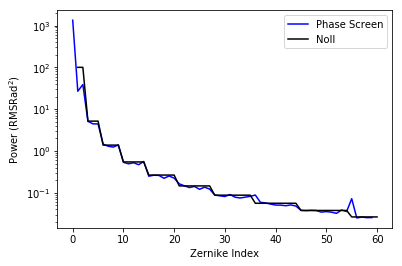

In [5]:
f, a = plt.subplots()
a.plot(z_vars_inf_f.mean(0), color="b", label="Phase Screen")
a.plot(range(1, n_zerns+1), noll[:n_zerns] , label="Noll", color="k")
a.set_yscale('log')
a.set_xlabel("Zernike Index")
a.set_ylabel("Power ($\mathrm{RMS Rad}^2$)")
plt.legend()

New size: 129
(128, 128)


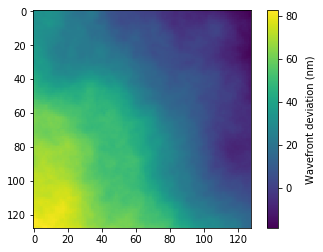

In [6]:
phase_screen = infinitephasescreen_fried.PhaseScreen(nx_size, pxl_scale, r0, L0, stencil_length_factor=stencil_length_factor)
print(phase_screen.scrn.shape)
plt.figure()
plt.imshow(phase_screen.scrn)
cbar = plt.colorbar()
cbar.set_label('Wavefront deviation (nm)', labelpad=8)